## Data Set Information:

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

## Attribute Information:

- InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
- UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
- CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal. The name of the country where a customer resides.

## Associated Tasks:

Classification, Regression, Clustering

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);

# virgulden sonra gösterilecek olan sayı sayısı
# pd.set_option('display.float_format', lambda x: '%.0f' % x)
import matplotlib.pyplot as plt

## Exploratory Data Analysis

In [3]:
#load the dataset 
#There are two sheeds in data set, we will focus only 2010-2011 period 
df_2010_2011 = pd.read_excel("online_retail.xlsx", sheet_name = "Year 2010-2011")

In [53]:
df = df_2010_2011.copy()

In [54]:
#check the head of the dataset
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [55]:
# information about rows and columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
Invoice        541910 non-null object
StockCode      541910 non-null object
Description    540456 non-null object
Quantity       541910 non-null int64
InvoiceDate    541910 non-null datetime64[ns]
Price          541910 non-null float64
Customer ID    406830 non-null float64
Country        541910 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


- Our dataset is composed of 541909 rows and 8 columns.
- Missing values in the CustomerID ans Description columns
- I decided to drop NAN values

In [56]:
df.dropna(inplace = True)

In [57]:
# in addition I will check for duplicate entries and remove those
df.drop_duplicates(inplace = True)

In [58]:
df.describe()

,Quantity,Price,Customer ID
count,401605.000000,401605.000000,401605.000000
mean,12.183245,3.474100,15281.154341
std,250.282726,69.763952,1714.008869
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


- As mentioned in the description of the dataset, some InvoiceNo start with the letter "c" = cancelled. Let's see if our assumption is correct about the negative quantity: -80995.
- We will look for the list of cancelled invoices and check if there is an invoice with that quantity.

In [59]:
#get cancelled transactions
cancelled_orders = df[df['Invoice'].astype(str).str.contains('C')]
cancelled_orders.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [60]:
cancelled_orders['Quantity'].describe()

count     8872.000000
mean       -30.774910
std       1172.249902
min     -80995.000000
25%         -6.000000
50%         -2.000000
75%         -1.000000
max         -1.000000
Name: Quantity, dtype: float64

In [61]:
len(df[df['Quantity'] < 0]) 

8872

As we expected, negative values in Quantity columns and invoice numbers with 'C' are same information and these are cancelled orders. Therefor I decided to drop of them.

In [62]:
df = df[df['Quantity'] > 0]

In [63]:
df.describe()

,Quantity,Price,Customer ID
count,392733.000000,392733.000000,392733.000000
mean,13.153687,3.125633,15287.728182
std,181.588189,22.240710,1713.570644
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


## RFM

RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries.

RFM stands for the three dimensions:

- Recency – How recently did the customer purchase?
- Frequency – How often do they purchase?
- Monetary Value – How much do they spend?

Here, Each of the three variables(Recency, Frequency, and Monetary) consists of four equal groups, which creates 64 (4x4x4) different customer segments.

In [64]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


I only need five columns CustomerID, InvoiceDate, Invoice, Quantity, and Price. 
- CustomerId will uniquely define customers, 
- InvoiceDate help to calculate recency of purchase, 
- Invoice helps to count the number of time transaction performed(frequency). 
- Quantity purchased in each transaction
- Price of each unit purchased by the customer will help to calculate the total purchased amount.

In [65]:
df = df[['Customer ID', 'InvoiceDate', 'Invoice', 'Quantity', 'Price']]

### 1) For Recency, Calculate the number of days between present date and date of last purchase each customer.

In [66]:
df["InvoiceDate"].min(), df["InvoiceDate"].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

In [67]:
import datetime as dt
PRESENT = dt.datetime(2011,12,10)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [68]:
df.groupby("Customer ID").agg({"InvoiceDate":"max"}).head()

,InvoiceDate
Customer ID,
12346.0,2011-01-18 10:01:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00


In [69]:
recency = df.groupby('Customer ID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days})

In [70]:
recency.head()

,InvoiceDate
Customer ID,
12346.0,325
12347.0,2
12348.0,75
12349.0,18
12350.0,310


### 2) For Frequency, Calculate the number of orders for each customer.

In [71]:
frequency= df.groupby('Customer ID').agg({'Invoice': lambda num: len(num)})

In [72]:
frequency.head()

,Invoice
Customer ID,
12346.0,1
12347.0,182
12348.0,31
12349.0,73
12350.0,17


### 3) For Monetary, Calculate sum of purchase price for each customer.

In [73]:
df['TotalPrice'] = df['Quantity'] * df['Price']

In [74]:
monetary= df.groupby('Customer ID').agg({'TotalPrice': lambda price: price.sum()})

In [75]:
monetary.head()

,TotalPrice
Customer ID,
12346.0,77183.60
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40


### RFM Analys

In [76]:
print(recency.shape,frequency.shape,monetary.shape)

(4339, 1) (4339, 1) (4339, 1)


In [77]:
rfm = pd.concat([recency, frequency, monetary],  axis=1)

In [78]:
rfm.columns=['recency','frequency','monetary']

In [79]:
rfm.head()

,recency,frequency,monetary
Customer ID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40


In [80]:
rfm["RecencyScore"] = pd.qcut(rfm['recency'], 5, ['5','4','3','2','1'])
rfm["FrequencyScore"] = pd.qcut(rfm['frequency'], 5, ['1','2','3','4','5'])
rfm["MonetaryScore"] = pd.qcut(rfm['monetary'], 5, ['1','2','3','4','5'])

In [81]:
rfm.head()

,recency,frequency,monetary,RecencyScore,FrequencyScore,MonetaryScore
Customer ID,,,,,,
12346.0,325,1,77183.60,1,1,5
12347.0,2,182,4310.00,5,5,5
12348.0,75,31,1797.24,2,3,4
12349.0,18,73,1757.55,4,4,4
12350.0,310,17,334.40,1,2,2


In [82]:
rfm["RFM_SCORE"] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str) + rfm['MonetaryScore'].astype(str)

In [83]:
rfm.head()

,recency,frequency,monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12346.0,325,1,77183.60,1,1,5,115
12347.0,2,182,4310.00,5,5,5,555
12348.0,75,31,1797.24,2,3,4,234
12349.0,18,73,1757.55,4,4,4,444
12350.0,310,17,334.40,1,2,2,122


In [84]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,4339.0,92.041484,100.007757,0.0,17.000,50.00,141.500,373.00
frequency,4339.0,90.512330,225.515289,1.0,17.000,41.00,98.000,7676.00
monetary,4339.0,2048.220072,8984.247808,0.0,306.455,668.56,1660.315,280206.02


In [85]:
rfm[rfm["RFM_SCORE"] == "555"].head()

,recency,frequency,monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12347.0,2,182,4310.00,5,5,5,555
12362.0,3,266,5226.23,5,5,5,555
12417.0,3,192,3649.10,5,5,5,555
12433.0,0,420,13375.87,5,5,5,555
12437.0,1,200,4951.41,5,5,5,555


In [86]:
rfm[rfm["RFM_SCORE"] == "111"].head()

,recency,frequency,monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12353.0,204,4,89.00,1,1,1,111
12361.0,287,10,189.90,1,1,1,111
12401.0,303,5,84.30,1,1,1,111
12402.0,323,11,225.60,1,1,1,111
12441.0,366,11,173.55,1,1,1,111


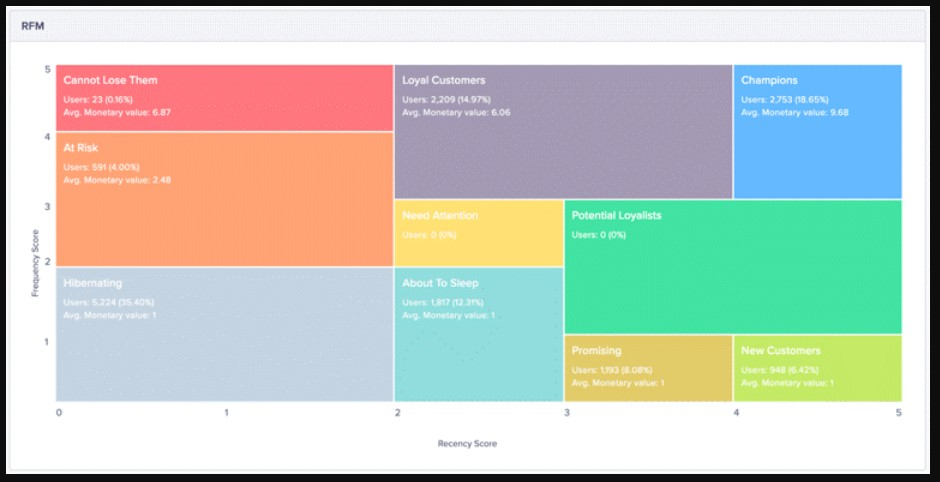

In [87]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [89]:
rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
rfm.head()

,recency,frequency,monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12346.0,325,1,77183.60,1,1,5,115,Hibernating
12347.0,2,182,4310.00,5,5,5,555,Champions
12348.0,75,31,1797.24,2,3,4,234,At Risk
12349.0,18,73,1757.55,4,4,4,444,Loyal Customers
12350.0,310,17,334.40,1,2,2,122,Hibernating


In [90]:
rfm[["Segment","recency","frequency","monetary"]].groupby("Segment").agg(["mean","count"])

recency         frequency           monetary      
                           mean count        mean count         mean count
Segment                                                                   
About to Sleep        52.176471   323   15.962848   323   449.729381   323
At Risk              163.743816   566   56.779152   566  1002.180636   566
Can't Loose          144.851852    81  179.617284    81  2399.085321    81
Champions              5.399007   604  285.819536   604  6967.495331   604
Hibernating          209.711111  1080   13.648148  1080   534.678317  1080
Loyal Customers       33.227384   818  154.870416   818  2838.375183   818
Need Attention        52.019704   203   41.197044   203   836.044433   203
New Customers          6.421053    57    7.578947    57  3618.697018    57
Potential Loyalists   15.629555   494   34.748988   494   908.328221   494
Promising             22.362832   113    7.707965   113   425.633628   113

In [91]:
rfm[rfm["Segment"] == "Need Attention"].head()

,recency,frequency,monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12372.0,71,52,1298.04,3,3,4,334,Need Attention
12413.0,66,38,758.10,3,3,3,333,Need Attention
12458.0,71,38,947.40,3,3,4,334,Need Attention
12475.0,53,36,723.38,3,3,3,333,Need Attention
12512.0,66,31,132.18,3,3,1,331,Need Attention


In [92]:
rfm[rfm["Segment"] == "Need Attention"].index

Float64Index([12372.0, 12413.0, 12458.0, 12475.0, 12512.0, 12571.0, 12631.0,
              12638.0, 12667.0, 12679.0,
              ...
              18088.0, 18104.0, 18126.0, 18136.0, 18160.0, 18170.0, 18171.0,
              18192.0, 18205.0, 18228.0],
             dtype='float64', name='Customer ID', length=203)

In [93]:
new_df = pd.DataFrame()
new_df["NeedAttentionID"] = rfm[rfm["Segment"] == "Need Attention"].index

In [94]:
new_df.head()

,NeedAttentionID
0,12372.0
1,12413.0
2,12458.0
3,12475.0
4,12512.0


In [96]:
new_df.to_csv("NeedAttentionCustomer.csv")